<a href="https://colab.research.google.com/github/SuryaTeja-aiml/GenAi_2303a52007/blob/main/2303A52007_GenAi_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Original Training Data Shape:")
print("Images (x_train):", x_train.shape) # (Num Samples, Height, Width)
print("Labels (y_train):", y_train.shape) # (Num Samples,)
print("\nOriginal Testing Data Shape:")
print("Images (x_test):", x_test.shape)
print("Labels (y_test):", y_test.shape)
print("\nExample Label:", y_train[0])

Original Training Data Shape:
Images (x_train): (60000, 28, 28)
Labels (y_train): (60000,)

Original Testing Data Shape:
Images (x_test): (10000, 28, 28)
Labels (y_test): (10000,)

Example Label: 5


In [4]:
img_rows, img_cols = 28, 28 # Standard MNIST dimensions
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1) # Store the shape for the model's input layer

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
num_classes = 10 # Digits 0 through 9
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
print("\n--- After Preprocessing ---")
print("Training Images Shape:", x_train.shape)
print("Testing Images Shape:", x_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)
print("\nExample One-Hot Encoded Label (for original label {}):".format(np.argmax(y_train[0])))
print(y_train[0])
print("\nInput Shape for Model:", input_shape)
print("Number of Classes:", num_classes)


--- After Preprocessing ---
Training Images Shape: (60000, 28, 28, 1)
Testing Images Shape: (10000, 28, 28, 1)
Training Labels Shape: (60000, 10)
Testing Labels Shape: (10000, 10)

Example One-Hot Encoded Label (for original label 5):
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Input Shape for Model: (28, 28, 1)
Number of Classes: 10


In [9]:
# --- Configuration / Parameters from Assignment ---
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = 10 # Digits 0-9
IMG_ROWS, IMG_COLS = 28, 28 # MNIST dimensions
OPTIMIZER = 'adam'
METRICS = ['accuracy']
LOSS_FUNCTION = 'categorical_crossentropy' # Standard for multi-class one-hot

In [10]:
model = Sequential(name="MNIST_CNN_Assignment")

# Convolution Layer - 1
model.add(Conv2D(filters=33,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 name='conv1'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Max Pooling Layer - 1
model.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))

In [12]:
# Convolution Layer - 2
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 name='conv2'))

In [13]:
# Max Pooling Layer - 2
model.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))

In [14]:
# Flatten Layer (to transition from 2D conv features to 1D for Dense layers)
model.add(Flatten(name='flatten'))

In [15]:
# Dense Layer
model.add(Dense(units=128, activation='relu', name='dense1'))

In [16]:
# Output Layer (Dense)
# Units = NUM_CLASSES (10 digits)
# Activation = 'softmax' for multi-class probability output
model.add(Dense(units=NUM_CLASSES, activation='softmax', name='output'))

In [18]:
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [19]:
model.summary()

Model: "MNIST_CNN_Assignment"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 33)     │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 33)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        19,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,620 (881.33 KB)

 Trainable params: 225,620 (881.33 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9159 - loss: 0.2805 - val_accuracy: 0.9845 - val_loss: 0.0447
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0417 - val_accuracy: 0.9883 - val_loss: 0.0358
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9903 - val_loss: 0.0277
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9919 - val_loss: 0.0250
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9954 - loss: 0.0134 - val_accuracy: 0.9909 - val_loss: 0.0295
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9913 - val_loss: 0.0304
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9970 - loss: 0.0087 - val_accuracy: 0.9885 - val_loss: 0.0426
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9979 - loss: 0.00

In [21]:
# Evaluate on Training Data
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Loss    : {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

Training Loss    : 0.0027
Training Accuracy: 0.9991 (99.91%)


In [22]:
# Evaluate on Testing Data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Testing Loss     : {test_loss:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Testing Loss     : 0.0672
Testing Accuracy : 0.9921 (99.21%)


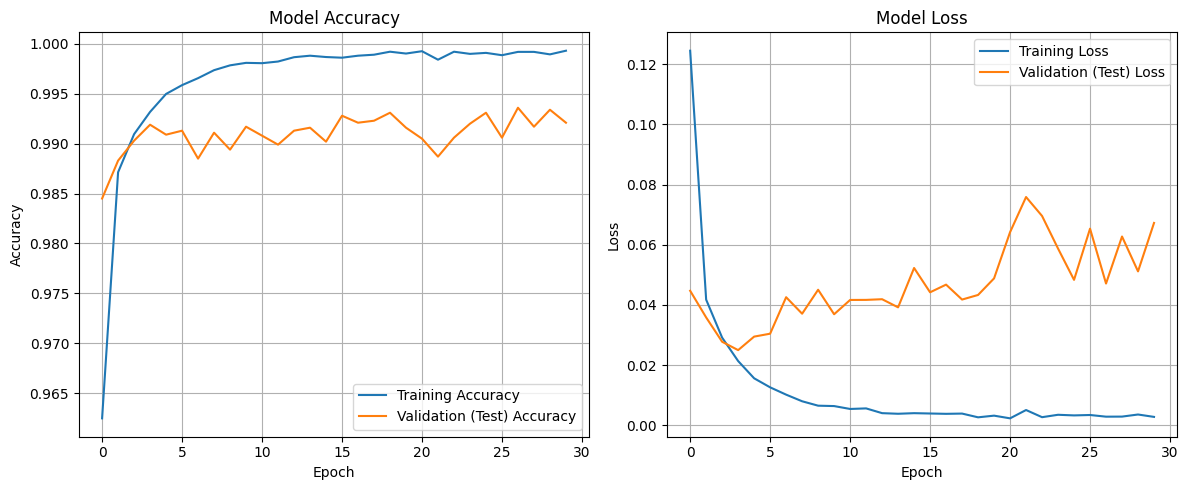

In [23]:
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation (Test) Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation (Test) Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


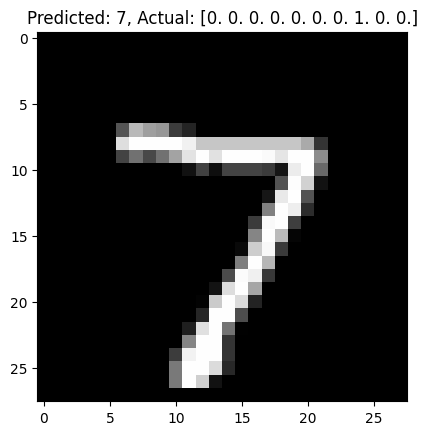

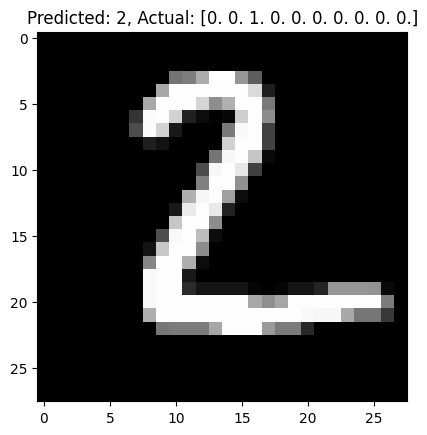

In [24]:
predictions = model.predict(x_test)

# Plot some predictions
def plot_image(index):
    plt.imshow(x_test[index].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.show()

# Display example predictions
plot_image(0)
plot_image(1)

In [25]:
model.save("mnist_cnn_model.h5")


--- Predicting 5 Random Test Samples ---

Sample #1 (Index: 2261)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


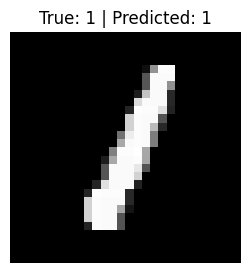

  True Label       : 1
  Predicted Label  : 1
  Result           : Correct Prediction

Sample #2 (Index: 8955)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


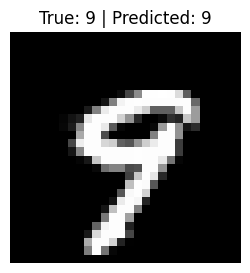

  True Label       : 9
  Predicted Label  : 9
  Result           : Correct Prediction

Sample #3 (Index: 7969)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


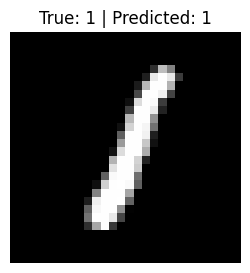

  True Label       : 1
  Predicted Label  : 1
  Result           : Correct Prediction

Sample #4 (Index: 2722)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


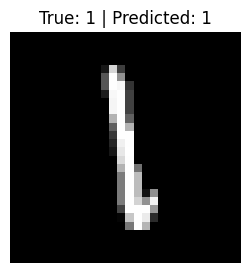

  True Label       : 1
  Predicted Label  : 1
  Result           : Correct Prediction

Sample #5 (Index: 3206)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


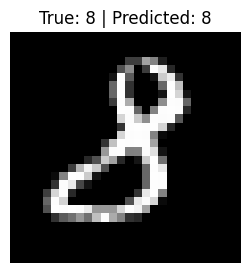

  True Label       : 8
  Predicted Label  : 8
  Result           : Correct Prediction

--- Individual Sample Testing Complete ---

--- Searching for a Misclassified Sample ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

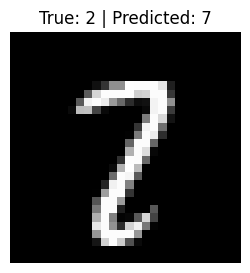

  True Label       : 2
  Predicted Label  : 7


In [26]:
# --- Testing the Model on Individual Samples ---

# Select a few random samples from the test set
num_samples_to_test = 5
random_indices = np.random.choice(x_test.shape[0], num_samples_to_test, replace=False)

print(f"\n--- Predicting {num_samples_to_test} Random Test Samples ---")

for i, index in enumerate(random_indices):
    print(f"\nSample #{i+1} (Index: {index})")

    # 1. Get the image and its true label
    # Note: x_test is already preprocessed (reshaped and normalized)
    # We need to add the batch dimension (1, 28, 28, 1) for model.predict
    image_to_predict = np.expand_dims(x_test[index], axis=0)
    true_label_one_hot = y_test[index]
    true_label_int = np.argmax(true_label_one_hot) # Convert back from one-hot

    # 2. Make the prediction
    prediction_probabilities = model.predict(image_to_predict)
    # prediction_probabilities is an array of 10 probabilities (one for each digit)

    # 3. Get the predicted class (the digit with the highest probability)
    predicted_label_int = np.argmax(prediction_probabilities)

    # 4. Display the results
    plt.figure(figsize=(3, 3))
    # Display the image (we need to remove the channel dimension for imshow)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label_int} | Predicted: {predicted_label_int}")
    plt.axis('off') # Hide axes
    plt.show()

    print(f"  True Label       : {true_label_int}")
    print(f"  Predicted Label  : {predicted_label_int}")
    # print(f"  Probabilities    : {prediction_probabilities.round(3)}") # Optional: show all probabilities

    if true_label_int == predicted_label_int:
        print("  Result           : Correct Prediction")
    else:
        print("  Result           : Incorrect Prediction")

print("\n--- Individual Sample Testing Complete ---")

# --- Optional: Finding Misclassified Samples ---
# You can iterate through the test set to find examples the model got wrong.
print("\n--- Searching for a Misclassified Sample ---")
misclassified_found = False
for i in range(len(x_test)):
    image_to_predict = np.expand_dims(x_test[i], axis=0)
    true_label_int = np.argmax(y_test[i])

    prediction_probabilities = model.predict(image_to_predict)
    predicted_label_int = np.argmax(prediction_probabilities)

    if true_label_int != predicted_label_int:
        print(f"\nMisclassified Sample Found (Index: {i})")
        plt.figure(figsize=(3, 3))
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_label_int} | Predicted: {predicted_label_int}")
        plt.axis('off')
        plt.show()
        print(f"  True Label       : {true_label_int}")
        print(f"  Predicted Label  : {predicted_label_int}")
        misclassified_found = True
        break # Stop after finding the first one

if not misclassified_found:
    print("No misclassified samples found in the searched portion (or model is perfect!).")